# VacationPy
---

## Starter Code to Import Libraries and Load the Weather and Coordinates Data

In [1]:
# Dependencies and Setup
import hvplot.pandas
import pandas as pd
import requests
import matplotlib.pyplot as plt
import numpy as np

# Import API key
from api_keys import geoapify_key

In [2]:
# Load the CSV file created in Part 1 into a Pandas DataFrame
city_data_df = pd.read_csv("output_data/cities.csv")

# Display sample data
city_data_df.head()

,City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,iskateley,67.6803,53.1512,248.85,100,93,2.57,RU,1705019778
1,1,waitangi,-43.9535,-176.5597,288.78,94,30,7.25,NZ,1705019778
2,2,ketchikan,55.3422,-131.6461,265.41,29,0,3.60,US,1705019730
3,3,iqaluit,63.7506,-68.5145,257.00,84,100,0.00,CA,1705019779
4,4,port-aux-francais,-49.3500,70.2167,277.43,79,100,15.36,TF,1705019780


---

### Step 1: Create a map that displays a point for every city in the `city_data_df` DataFrame. The size of the point should be the humidity in each city.

<function matplotlib.pyplot.show(close=None, block=None)>

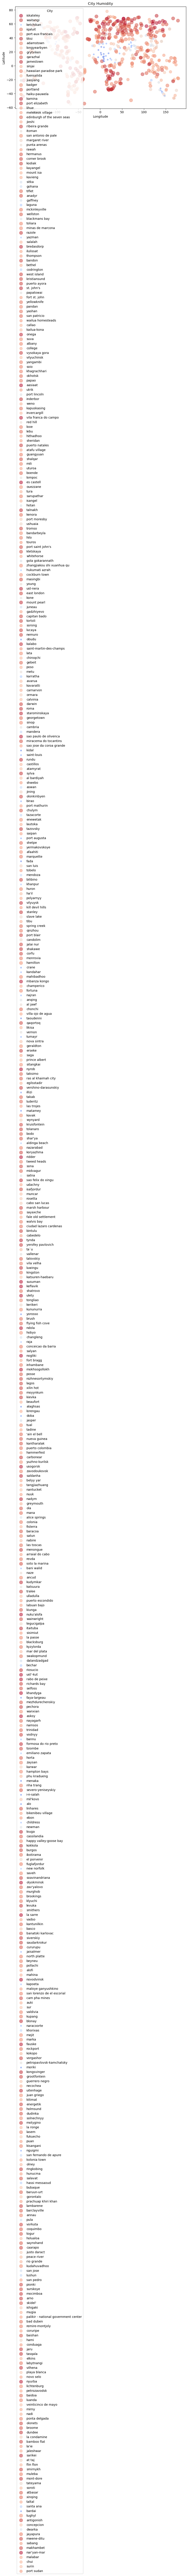

In [3]:
# Configure the map plot
colormap =plt.cm.coolwarm

#Add dots
min_dot = 20
max_dot = 150
#Add ranges and bins
ranges = np.linspace(city_data_df["Humidity"].min(),city_data_df["Humidity"].max(),5)
bins = np.linspace(min_dot,max_dot,len(ranges))

# Display the map
plt.figure(figsize=(10,6))
for i, row in city_data_df.iterrows():
    color = colormap(row["Humidity"]/100)
    for j in range(len(ranges) - 1):
        if row["Humidity"]>= ranges[j] and row["Humidity"] <= ranges[j + 1]:
            size = bins[j]
    
    plt.scatter(row["Lng"],row["Lat"], s = size, color = color, alpha = 0.5, label = row["City"])
        
# Labels and legend
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("City Humidity")
plt.legend(title = "City")

#Show
plt.show

### Step 2: Narrow down the `city_data_df` DataFrame to find your ideal weather condition

In [4]:
# Narrow down cities that fit criteria and drop any results with null values
narrow_data_df = city_data_df[
    (city_data_df["Max Temp"] < 299.817) 
    & (city_data_df["Max Temp"] > 283.15)
    & (city_data_df["Wind Speed"] < 10) 
    & (city_data_df["Cloudiness"] == 0)
]

# Drop any rows with null values
narrow_city_data_df = city_data_df.dropna()

# Display sample data

narrow_city_data_df.head()

,City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,iskateley,67.6803,53.1512,248.85,100,93,2.57,RU,1705019778
1,1,waitangi,-43.9535,-176.5597,288.78,94,30,7.25,NZ,1705019778
2,2,ketchikan,55.3422,-131.6461,265.41,29,0,3.60,US,1705019730
3,3,iqaluit,63.7506,-68.5145,257.00,84,100,0.00,CA,1705019779
4,4,port-aux-francais,-49.3500,70.2167,277.43,79,100,15.36,TF,1705019780


### Step 3: Create a new DataFrame called `hotel_df`.

In [5]:
# Use the Pandas copy function to create DataFrame called hotel_df to store the city, country, coordinates, and humidity
hotel_df = narrow_city_data_df[["City","Country","Lat","Lng","Humidity"]].copy()

# Add an empty column, "Hotel Name," to the DataFrame so you can store the hotel found using the Geoapify API
hotel_df["Hotel Name"] = ""

# Display sample data
hotel_df.head()

,City,Country,Lat,Lng,Humidity,Hotel Name
0,iskateley,RU,67.6803,53.1512,100,
1,waitangi,NZ,-43.9535,-176.5597,94,
2,ketchikan,US,55.3422,-131.6461,29,
3,iqaluit,CA,63.7506,-68.5145,84,
4,port-aux-francais,TF,-49.3500,70.2167,79,


### Step 4: For each city, use the Geoapify API to find the first hotel located within 10,000 metres of your coordinates.

In [6]:
import requests
from api_keys import geoapify_key

# Set parameters to search for a hotel
radius = 10000
base_url = "https://api.geoapify.com/v2/places"
# Print a message to follow up the hotel search
print("Starting hotel search")

# Iterate through the hotel_df DataFrame
for index, row in hotel_df.iterrows():
    # get latitude, longitude from the DataFrame
    lat = row["Lat"]
    lng = row["Lng"]
    
    params = {"categories": "accommodation.hotel", 
          "limit": 10, 
          "filter": f"circle:{lng},{lat},{radius}",
          "bias": f"proximity:{lng},{lat}",
          "api_key": geoapify_key
             }



    # Make and API request using the params dictionaty
    response = requests.get(base_url, params=params)
    
    # Convert the API response to JSON format
    name_address = response.json()
    
    # Grab the first hotel from the results and store the name in the hotel_df DataFrame
    try:
        hotel_df.loc[index, "Hotel Name"] = name_address["features"][0]["properties"]["name"]
    except (KeyError, IndexError):
        # If no hotel is found, set the hotel name as "No hotel found".
        hotel_df.loc[index, "Hotel Name"] = "No hotel found"
        
    # Log the search results
    print(f"{hotel_df.loc[index, 'City']} - nearest hotel: {hotel_df.loc[index, 'Hotel Name']}")

# Display sample data
hotel_df

Starting hotel search
iskateley - nearest hotel: Авантаж
waitangi - nearest hotel: Hotel Chathams
ketchikan - nearest hotel: Cape Fox Lodge
iqaluit - nearest hotel: Frobisher Inn
port-aux-francais - nearest hotel: Keravel
tiksi - nearest hotel: Арктика
adamstown - nearest hotel: No hotel found
longyearbyen - nearest hotel: The Vault
grytviken - nearest hotel: No hotel found
qarazhal - nearest hotel: No hotel found
jamestown - nearest hotel: DoubleTree Jamestown
sinjai - nearest hotel: Hotel Sinjai
hawaiian paradise park - nearest hotel: No hotel found
fuensalida - nearest hotel: Hotel Castilla
jiaojiang - nearest hotel: 台州远洲凤凰山庄
badger - nearest hotel: Clarion Hotel & Suites
portland - nearest hotel: the Hoxton
haiku-pauwela - nearest hotel: Inn At Mama's Fish House
kamina - nearest hotel: Hôtel DG
port elizabeth - nearest hotel: Waterford Hotel
lihue - nearest hotel: Kauai Palms
melekeok village - nearest hotel: No hotel found
edinburgh of the seven seas - nearest hotel: No hotel foun

khanpur - nearest hotel: Lavish Hotel
huron - nearest hotel: No hotel found
ha'il - nearest hotel: فندق كلاسيك
polyarnyy - nearest hotel: No hotel found
vilyuysk - nearest hotel: Мария
kill devil hills - nearest hotel: Mariner Days Inn & Suites
stanley - nearest hotel: Hotel 52
slave lake - nearest hotel: Northwest Inn
tibu - nearest hotel: No hotel found
spring creek - nearest hotel: No hotel found
qinzhou - nearest hotel: 天骄国际酒店
port blair - nearest hotel: Andaman Ocean Breeze
candolim - nearest hotel: Silver Sands Holiday Village
jalai nur - nearest hotel: 满洲里福门客栈
shakawe - nearest hotel: EdenWood guesthouse
corfu - nearest hotel: Hotel Bella Venezia
monrovia - nearest hotel: Bella Casa Hotel
hamilton - nearest hotel: North Vista Manor
crane - nearest hotel: No hotel found
kandahar - nearest hotel: No hotel found
mahibadhoo - nearest hotel: No hotel found
mbanza kongo - nearest hotel: Hotel Estrela de Congo
champerico - nearest hotel: Hotel y Restaurante El Submarino
fortuna - neare

alo - nearest hotel: No hotel found
linhares - nearest hotel: Days Inn Linhares
bikenibeu village - nearest hotel: Otintaai Hotel
ebon - nearest hotel: No hotel found
childress - nearest hotel: Red Roof Inn Childress
newman - nearest hotel: No hotel found
louga - nearest hotel: Луга
cassilandia - nearest hotel: No hotel found
happy valley-goose bay - nearest hotel: Hotel North Two
kokkola - nearest hotel: Hotelli Seurahuone
burgos - nearest hotel: Abba Burgos
ibotirama - nearest hotel: Glória Palace Hotel
el porvenir - nearest hotel: No hotel found
fuglafjordur - nearest hotel: No hotel found
new norfolk - nearest hotel: Woodbridge on the Derwent
saveh - nearest hotel: هتل صدرا
soavinandriana - nearest hotel: Farihy Hôtel
olyokminsk - nearest hotel: Колос
zav'yalovo - nearest hotel: Отель Сиреневый сад
murghob - nearest hotel: Pamir Hotel
brookings - nearest hotel: Quality Inn
klyuchi - nearest hotel: No hotel found
levuka - nearest hotel: No hotel found
smithers - nearest hotel: Sunsh

,City,Country,Lat,Lng,Humidity,Hotel Name
0,iskateley,RU,67.6803,53.1512,100,Авантаж
1,waitangi,NZ,-43.9535,-176.5597,94,Hotel Chathams
2,ketchikan,US,55.3422,-131.6461,29,Cape Fox Lodge
3,iqaluit,CA,63.7506,-68.5145,84,Frobisher Inn
4,port-aux-francais,TF,-49.3500,70.2167,79,Keravel
...,...,...,...,...,...,...
549,nar'yan-mar,RU,67.6713,53.0870,100,"Гостиница ""Агат"""
550,malabar,AU,-33.9667,151.2500,72,Coogee Bay Boutique Hotel
551,chui,UY,-33.6971,-53.4616,69,Alerces
552,surin,TH,14.8818,103.4936,65,Ban Changton Guest House


In [8]:
hotel_df_cleaned = hotel_df.dropna()
hotel_df_cleaned.head()

,City,Country,Lat,Lng,Humidity,Hotel Name
0,iskateley,RU,67.6803,53.1512,100,Авантаж
1,waitangi,NZ,-43.9535,-176.5597,94,Hotel Chathams
2,ketchikan,US,55.3422,-131.6461,29,Cape Fox Lodge
3,iqaluit,CA,63.7506,-68.5145,84,Frobisher Inn
4,port-aux-francais,TF,-49.3500,70.2167,79,Keravel


### Step 5: Add the hotel name and the country as additional information in the hover message for each city in the map.

In [7]:
%%capture --no-display

# Configure the map plot
# YOUR CODE HERE

# Display the map
# YOUR CODE HERE

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [Lng,Lat]   (City,Humidity,Hotel Name,Country)